Replicate Policy Impact in KW94 page 667:
"a 500 dollar per-perod subsidy assuming data set one paramters increases schooling by 1.44 periods"

In [1]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import respy as rp

from python.mc_uncertainty_propagation import *
from python.model_wrapper import model_wrapper_kw_94
from python.cov_matrix import create_cov_matrix
from python.distplot import distplot
from python.convergence_plot import convergence_plot

In [2]:
params, options = rp.get_example_model("kw_94_one", with_data=False)
params

value  \
category    name                                  
delta       delta                        0.9500   
wage_a      constant                     9.2100   
            exp_edu                      0.0380   
            exp_a                        0.0330   
            exp_a_square                -0.0005   
            exp_b                        0.0000   
            exp_b_square                 0.0000   
wage_b      constant                     8.4800   
            exp_edu                      0.0700   
            exp_b                        0.0670   
            exp_b_square                -0.0010   
            exp_a                        0.0220   
            exp_a_square                -0.0005   
nonpec_edu  constant                     0.0000   
            at_least_twelve_exp_edu      0.0000   
            not_edu_last_period      -4000.0000   
nonpec_home constant                 17750.0000   
shocks      sd_a                         0.2000   
            sd_b                         0.2500   
            sd_edu                    1500.0000   
            sd_home                   1500.0000   
            corr_b_a                     0.0000   
            corr_edu_a                   0.0000   
            corr_edu_b                   0.0000   
            corr_home_a                  0.0000   
            corr_home_b                  0.0000   
            corr_home_edu                0.0000   
meas_error  sd_a                         1.0000   
            sd_b                         1.0000   

                                                                               comment  
category    name                                                                        
delta       delta                                                      discount factor  
wage_a      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_a                                     return to same sector experience  
            exp_a_square                   return to same sector, quadratic experience  
            exp_b                                    return to other sector experience  
            exp_b_square                  return to other sector, quadratic experience  
wage_b      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_b                                     return to same sector experience  
            exp_b_square                   return to same sector, quadratic experience  
            exp_a                                    return to other sector experience  
            exp_a_square                  return to other sector, quadratic experience  
nonpec_edu  constant                            constant reward for choosing education  
            at_least_twelve_exp_edu        reward for going to college (tuition, etc.)  
            not_edu_last_period                        reward for going back to school  
nonpec_home constant                         constant reward of non-market alternative  
shocks      sd_a                     Element 1,1 of standard-deviation/correlation ...  
            sd_b                     Element 2,2 of standard-deviation/correlation ...  
            sd_edu                   Element 3,3 of standard-deviation/correlation ...  
            sd_home                  Element 4,4 of standard-deviation/correlation ...  
            corr_b_a                 Element 2,1 of standard-deviation/correlation ...  
            corr_edu_a               Element 3,1 of standard-deviation/correlation ...  
            corr_edu_b               Element 3,2 of standard-deviation/correlation ...  
            corr_home_a              Element 4,1 of standard-deviation/correlation ...  
            corr_home_b              Element 4,2 of stand

In [3]:
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
p = pd.Series(data=df["true"].values, index=df["parameter"].values)
ds1 = transform_params_kw94_respy(p)
ds1

category     name                   
delta        delta                          0.9500
wage_a       constant                       9.2100
             exp_edu                        0.0380
             exp_a                          0.0330
             exp_a_square                  -0.0005
             exp_b                          0.0000
             exp_b_square                  -0.0000
wage_b       constant                       8.4800
             exp_edu                        0.0700
             exp_b                          0.0670
             exp_b_square                  -0.0010
             exp_a                          0.0220
             exp_a_square                  -0.0005
nonpec_edu   constant                       0.0000
             at_least_twelve_exp_edu       -0.0000
             not_edu_last_period        -4000.0000
nonpec_home  constant                   17750.0000
shocks       sd_a                           0.2000
             sd_b                           0

## Check convergence behavior for DS1

In [4]:
params, options = rp.get_example_model("kw_94_one", with_data=False)

In [5]:
# qois differ partly about 0.03 from rp.replication due to bootstrap deletion.

# compute expected qoi via respy.
qoi_mean_params_respy = model_wrapper_kw_94(params["value"].to_numpy(), 500)[0] - model_wrapper_kw_94(params["value"].to_numpy(), 0)[0]
qoi_mean_params_respy

1.5417499999999986

In [6]:
# compute expected qoi via csv and transform function.
# For Dataset 3, values are slightly different because shocks are computed slightly differently.
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
params_csv_temp = pd.Series(data=df["true"].values, index=df["parameter"].values)
params_csv = transform_params_kw94_respy(params_csv_temp)
qoi_mean_params = model_wrapper_kw_94(params_csv.to_numpy(), 500)[0] - model_wrapper_kw_94(params_csv.to_numpy(), 0)[0]
qoi_mean_params

1.5417499999999986

In [7]:
cov_df = create_cov_matrix()

In [8]:
# get mean vector from KW94 table4.1 vector. 
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
mean = pd.Series(data=df["true"].values, index=df["parameter"].values)

In [9]:
qoi, rp_param_draws = mc_uncertainty_propagation(mean, cov_df, 10, save=True)

In [10]:
with open('json/qoi.json') as json_file:
    qoi_json = json.load(json_file)

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

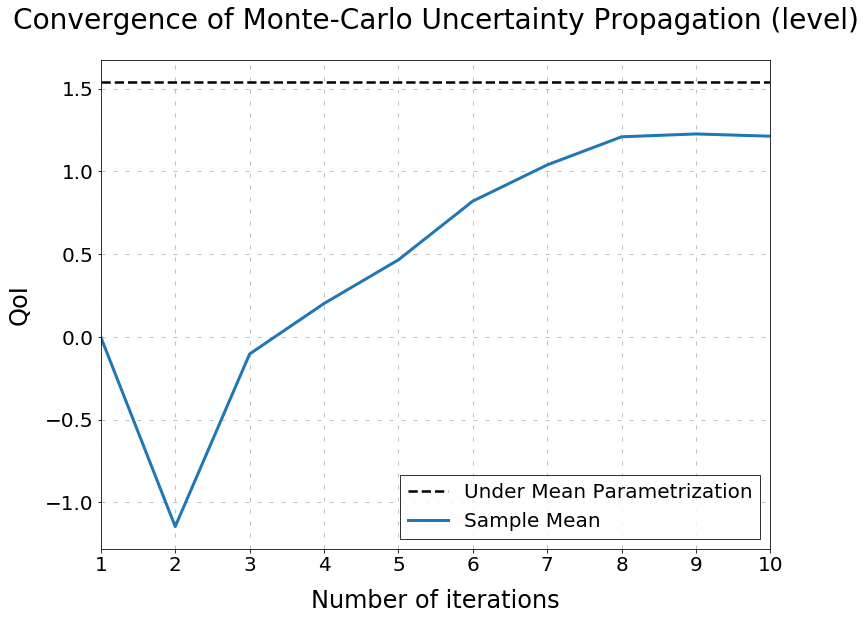

In [11]:
convergence_plot(qoi_json, qoi_mean_params, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

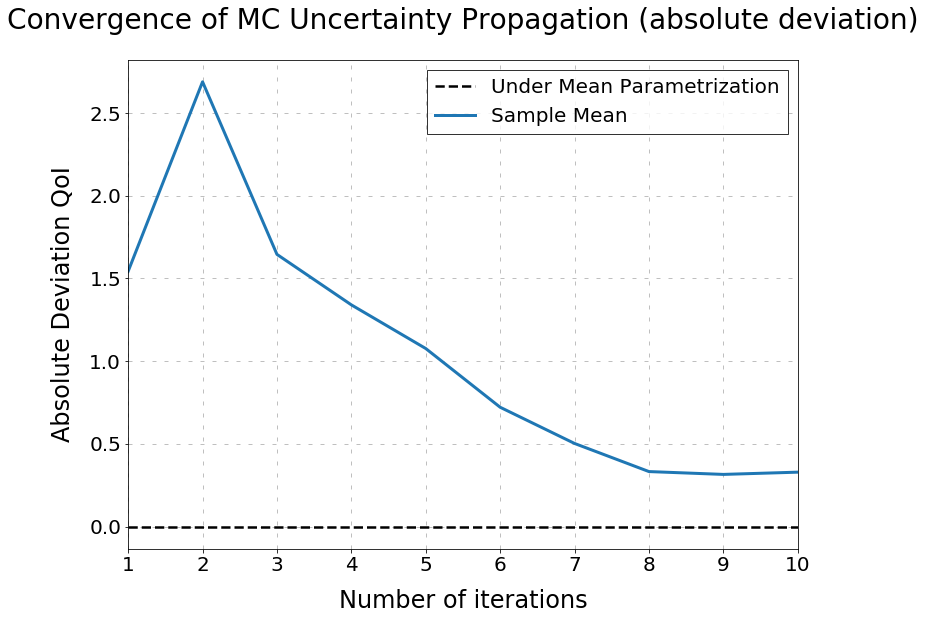

In [12]:
convergence_plot(qoi_json, qoi_mean_params, "Absolute Deviation QoI", absolute_deviation=True)

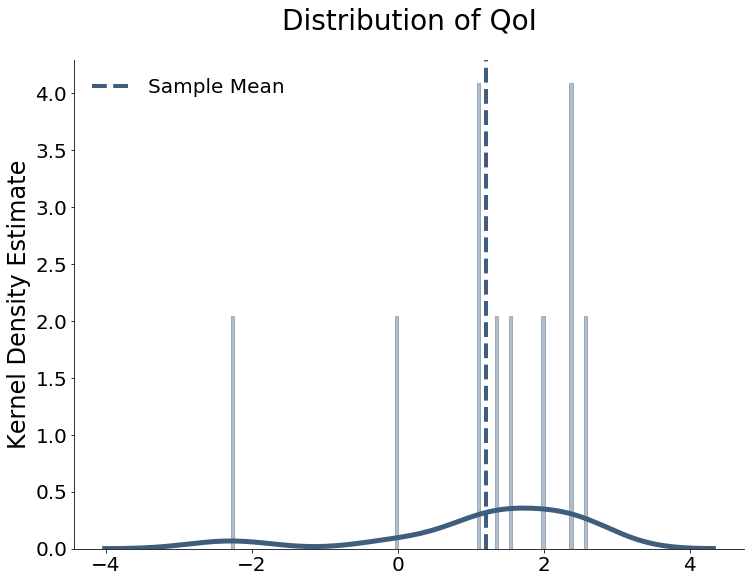

In [13]:
distplot(qoi_json, 'QoI')

In [16]:
np.mean(qoi_json)

1.2129749999999997

In [24]:
rp_param_draws_csv = pd.read_csv("csv/input_parameters.csv", sep=",")

In [25]:
rp_param_draws_csv

,category,name,value,value.1,value.2,value.3,value.4,value.5,value.6,value.7,value.8,value.9
0,delta,delta,0.950000,0.950000,0.950000,0.950000,0.950000,0.950000,0.950000,0.950000,0.950000,0.950000
1,wage_a,constant,9.209665,9.210934,9.204104,9.209172,9.208319,9.207878,9.208573,9.209364,9.209581,9.210156
2,wage_a,exp_edu,0.037967,0.038077,0.037868,0.038187,0.037693,0.038071,0.037967,0.038024,0.037827,0.037864
3,wage_a,exp_a,0.033118,0.033260,0.032932,0.033070,0.033162,0.033175,0.032808,0.032753,0.032866,0.033163
4,wage_a,exp_a_square,-0.000486,-0.000498,-0.000519,-0.000501,-0.000506,-0.000495,-0.000505,-0.000511,-0.000477,-0.000507
5,wage_a,exp_b,0.002514,0.000736,-0.000640,0.000884,-0.001390,-0.000144,0.001465,-0.000597,-0.000616,-0.001239
6,wage_a,exp_b_square,0.000120,-0.000027,0.000046,0.000036,0.000001,0.000094,-0.000011,0.000061,-0.000013,-0.000030
7,wage_b,constant,8.477590,8.479587,8.480966,8.479588,8.476874,8.480171,8.480803,8.480071,8.483030,8.480416
8,wage_b,exp_edu,0.070124,0.069896,0.069897,0.070082,0.069975,0.069908,0.070138,0.069963,0.070064,0.070057
9,wage_b,exp_b,0.067167,0.067044,0.067095,0.066946,0.066914,0.067176,0.066975,0.067253,0.067059,0.067043
